In [37]:
using LowLevelFEM
import LowLevelFEM as FEM

gmsh.initialize()

In [38]:
using SparseArrays, LinearAlgebra

In [39]:
gmsh.open("body2.geo")

Info    : Reading 'body2.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00105283s, CPU 0.00105s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 20%] Meshing surface 2 (Transfinite)
Info    : [ 40%] Meshing surface 3 (Transfinite)
Info    : [ 60%] Meshing surface 4 (Transfinite)
Info    : [ 70%] Meshing surface 5 (Transfinite)
Info    : [ 90%] Meshing surface 6 (Transfinite)
Info    : Done meshing 2D (Wall 0.000655435s, CPU 0.000652s)
Info    : Meshing 3D..

In [40]:
hooke = FEM.material("body", E=260, ν=0.3)
nonlin = FEM.material("body", E=260, ν=0.3, type=:StVenantKirchhoff)
nonlin = FEM.material("body", E=260, ν=0.3, type=:NeoHookeCompressible)
linelast = FEM.Problem([hooke])
nonlinelast = FEM.Problem([nonlin])

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 61)
Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 61)


LowLevelFEM.Problem("body2", :Solid, 3, 3, LowLevelFEM.Material[LowLevelFEM.Material("body", :NeoHookeCompressible, 260.0, 0.3, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 150.0, 100.0, 216.66666666666666)], 1.0, 525)

In [41]:
left = FEM.displacementConstraint("left", ux=0, uy=0, uz=0)
right = FEM.displacementConstraint("right", ux=0)

("right", 0, 0 + 1im, 0 + 1im)

In [42]:
fy(x, y, z) = (-z + 0.5) * 1
fz(x, y, z) = (y - 0.5) * 1
load = FEM.load("right", fy=fy, fz=fz)

("right", 0, Main.fy, Main.fz)

In [43]:
q = FEM.solveDisplacement(linelast, [load], [left, right])
A1 = FEM.solveStrain(linelast, q)
F1 = FEM.solveStress(linelast, q)

LowLevelFEM.TensorField([[3.383732110933882e-13; 0.2692254832004146; … ; -0.023113781143209965; -0.09687202121567351;;], [2.2686366674129488e-13; 0.10843452597353223; … ; 0.006397603450795063; -0.007620512119103489;;], [2.1822799643744784e-13; 0.11089682991113017; … ; -0.0010785097652000336; 0.005333753161115146;;], [1.6001566391365962e-13; 0.11533473241406283; … ; 0.00011585449316356411; -0.0012727946603998883;;], [3.626064021527292e-13; 0.11404263539153398; … ; -4.001999831526604e-6; 0.0002004803437032944;;], [-5.644022033589324e-13; 0.11426354045102997; … ; -1.1090769677646328e-6; -2.1094436312643497e-5;;], [-4.225388763109007e-12; 0.11424020391296412; … ; 1.338227639813283e-7; 1.0950889074939994e-6;;], [-1.1459124529682071e-11; 0.11424072543165104; … ; 5.5864501219415885e-8; -6.929092450638427e-9;;], [-4.90954394509135e-11; 0.11424105706854502; … ; -2.953421673890233e-8; 4.1891778511816274e-8;;], [6.769182732488388e-10; 0.11424100265259272; … ; 2.563152468049168e-9; -7.525803016796

In [44]:
u1 = FEM.showDoFResults(linelast, q, :uvec)

0

In [45]:
FEM.showElementResults(linelast, A1, :ex)
FEM.showElementResults(linelast, A1, :ey)
FEM.showElementResults(linelast, A1, :ez)
FEM.showElementResults(linelast, A1, :exy)
FEM.showElementResults(linelast, A1, :eyz)
FEM.showElementResults(linelast, A1, :ezx)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


6

In [46]:
r, e = FEM.solveDeformation(nonlinelast, [load], [left, right],
    followerLoad=true,
    loadSteps=10,
    rampedLoad=true,
    rampedSupport=false,
    maxIteration=10,
    saveSteps=true,
    saveIterations=false,
    plotConvergence=true,
    relativeError=1e-5
)

(LowLevelFEM.VectorField(Matrix{Float64}[], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.7499999999999999 0.7449289647866972 … 0.6978633460236933 0.6918306886319705; 0.75 0.7549736454015263 … 0.7929965136868363 0.796979147993769], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], Int64[], 11, :u3D), Any[0.0022695438902279553, 0.0005062422916037384, 0.0013067148847489868, 0.00033684511074466025, 0.0005920851673888309, 0.0004204032266897272, 0.0002923827420891627, 0.0002579002275516105, 0.0002446205209048219, 0.00023499058168081587  …  0.0025998637308164724, 0.0009647728528059047, 0.0008969765338765213, 0.00043916248287417076, 0.0005446389593539207, 0.0004965567000084397, 0.00044506170845835075, 0.00041202697474495675, 0.00039111236577226555, 0.00037793231975105423])

In [47]:
r1 = FEM.showDeformationResults(nonlinelast, r, :uvec)

7

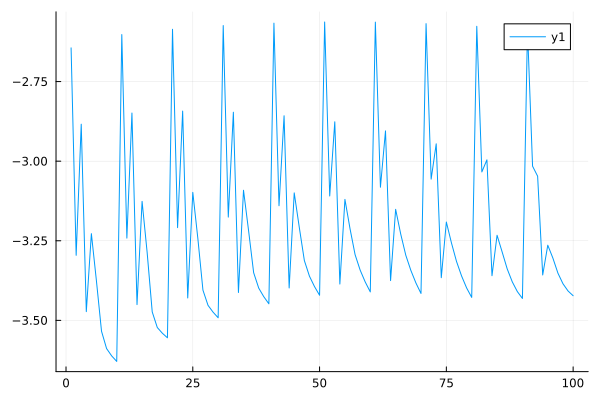

In [48]:
using Plots
plot(log10.(e))

In [49]:
FEM.probe(r, 5, 0.3, 0.3, step=r.nsteps)

3-element Vector{Float64}:
 5.000044058185276
 0.3235084663275875
 0.2789740801167023

In [50]:
FEM.probe(r, "A", step=r.nsteps)

3-element Vector{Float64}:
 5.000044058185276
 0.3235084663275875
 0.2789740801167023

In [51]:
D = FEM.deformationGradient(linelast, q)

LowLevelFEM.TensorField([[-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.005578855686290726; … ; -0.11413372617209373; 0.000400094

In [52]:
A2 = (D + D') / 2

LowLevelFEM.TensorField([[-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; … ; -0.00024107714516317935; 0.0004000946482021206;;], [-9.257053736618919e-6; -0.0018548353228477587; 

In [53]:
Ex = linelast.material[1].E
ν = linelast.material[1].ν
I = unitTensor(A)
F2 = Ex / (1 + ν) * (A + ν / (1 - 2ν) * I * trace(A))

LowLevelFEM.TensorField([[-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636;;], [-0.003620391188505205; -0.37096706456955175; … ; -0.04821542903263587; 0.0032478813662217636

In [54]:
FEM.showElementResults(linelast, A2, :ex)
FEM.showElementResults(linelast, A2, :ey)
FEM.showElementResults(linelast, A2, :ez)
FEM.showElementResults(linelast, A2, :exy)
FEM.showElementResults(linelast, A2, :eyz)
FEM.showElementResults(linelast, A2, :ezx)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


13

In [55]:
FEM.openPostProcessor()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XRequest.18: BadValue 0x0


In [56]:
gmsh.finalize()